In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
np.logspace(-4,-1, 5)

array([0.0001    , 0.00056234, 0.00316228, 0.01778279, 0.1       ])

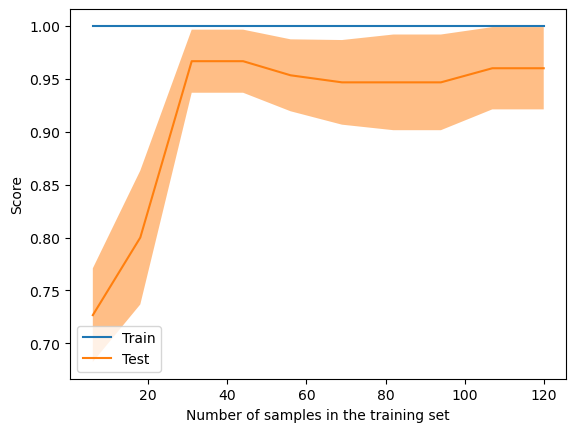

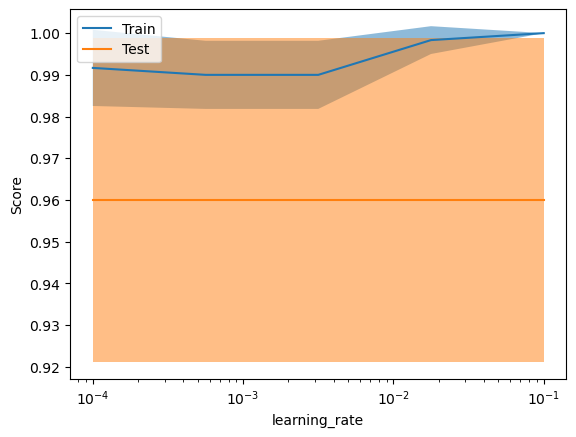

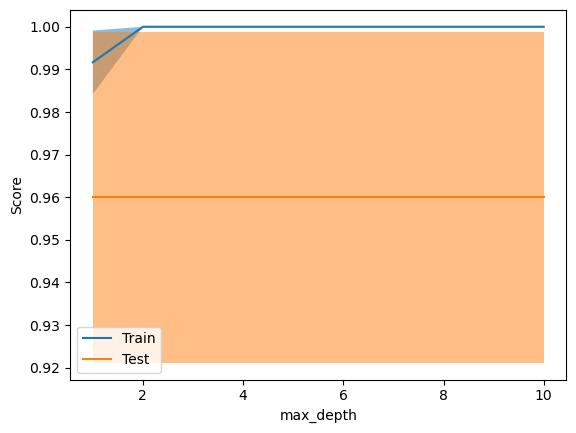

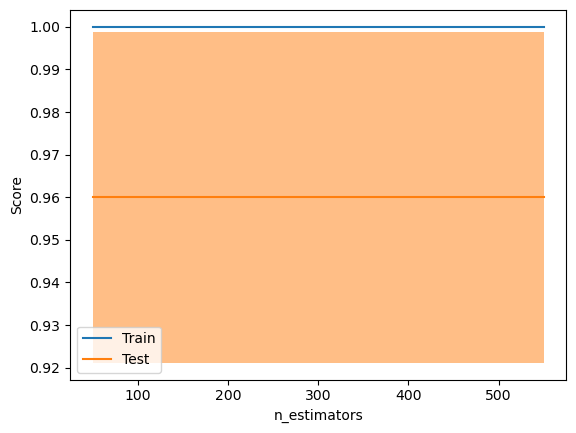

In [47]:
# Iris

# shuffled dataset
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Default params score
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']


# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves

ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "learning_rate", 
                                      param_range = np.logspace(-4,-1, 5))

# Validation Curve for pre-pruning
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "max_depth", 
                                      param_range = [1,2,5,10])
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "n_estimators", 
                                      param_range = [x for x in range(50,600,100)])


In [15]:
# search for optimal params
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .5)

params = { 
    'learning_rate': [.05, .02, .03],
    'n_estimators': [100],
    'ccp_alpha': [.01, .03]
}

clf = GridSearchCV(GradientBoostingClassifier(), params)
clf.fit(X_train, y_train)
clf.best_params_

{'ccp_alpha': 0.01, 'learning_rate': 0.05, 'n_estimators': 100}

CV test score: 0.96
training time: 0.15660738945007324


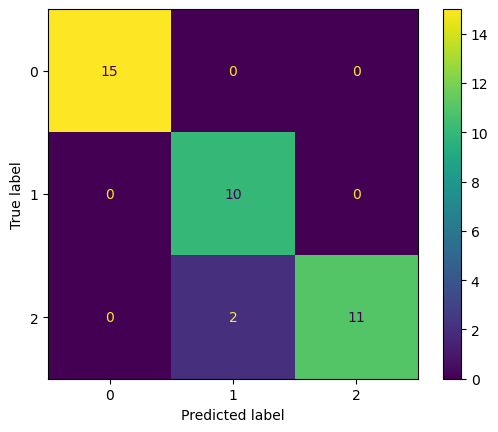

In [5]:
# Final eval

# final training with optimal param

# iris
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = GradientBoostingClassifier(random_state=0, 
                                 learning_rate = .05, n_estimators = 100, ccp_alpha = .01)
clf.fit(X_train, y_train)
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("training time:", fit_time)



# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()

In [6]:
# search for optimal params
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

params = { 
    'learning_rate': [.03, .05, .08],
    'n_estimators': [100,200,300],
    'ccp_alpha': [.02, .03, .05]
}

clf = GridSearchCV(GradientBoostingClassifier(), params)
clf.fit(X_train, y_train)
clf.best_params_

{'ccp_alpha': 0.02, 'learning_rate': 0.03, 'n_estimators': 100}

CV test score: 0.9209284272628475
training time: 3.369669246673584


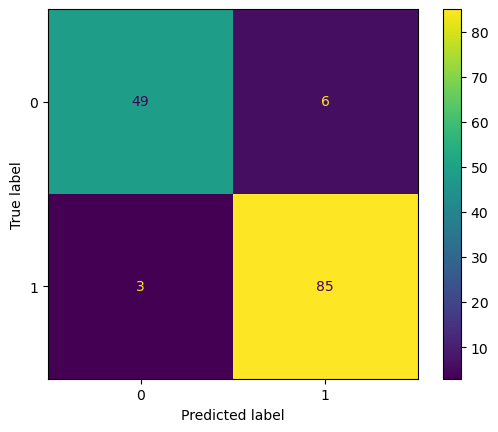

In [9]:
# BC Final eval

# final training with optimal param

X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = GradientBoostingClassifier(random_state=0, 
                                 learning_rate = .05, n_estimators = 300, ccp_alpha = .02)
clf.fit(X_train, y_train)
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("training time:", fit_time)



# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()

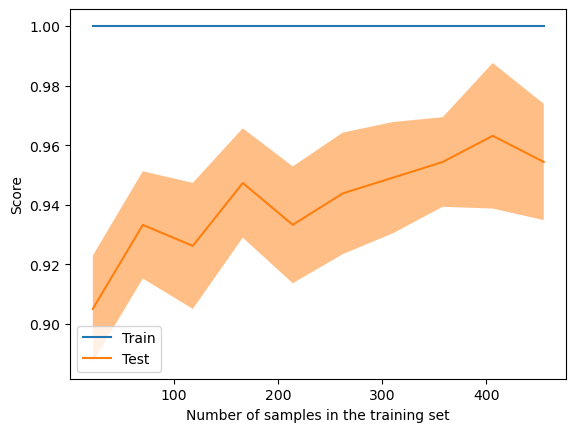

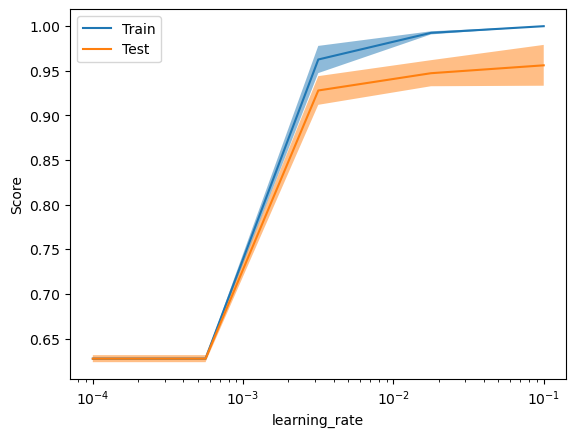

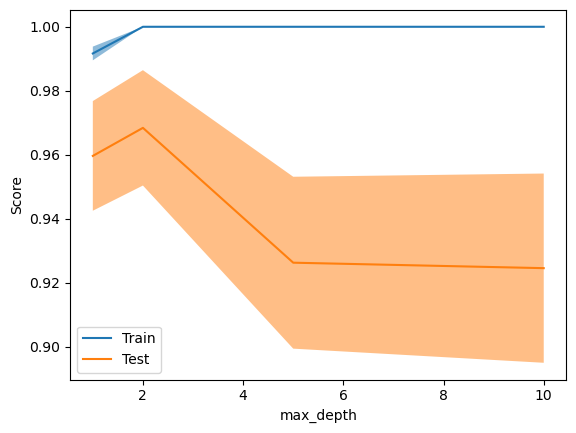

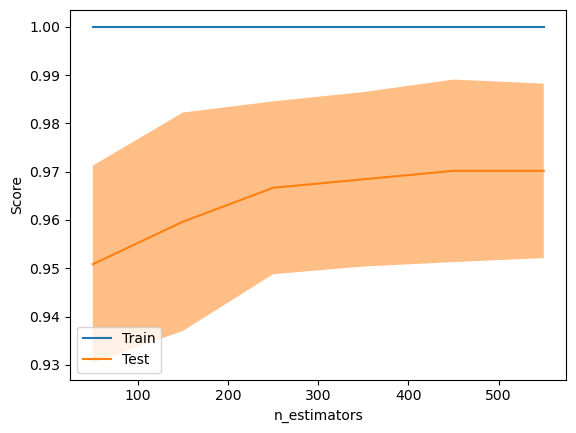

In [46]:
# BC

# shuffled dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Default params score
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']


# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves

ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "learning_rate", 
                                      param_range = np.logspace(-4,-1, 5))

# Validation Curve for pre-pruning
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "max_depth", 
                                      param_range = [1,2,5,10])
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "n_estimators", 
                                      param_range = [x for x in range(50,600,100)])


In [2]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 300, learning_rate = 0.05, max_depth = 2)
cv_results = cross_validate(clf, X, y)
f1_results = cross_validate(clf, X, y, scoring = 'f1')
f1_score = f1_results['test_score'].mean()
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("f1 test score:", f1_score)
print("training time:", fit_time)

CV test score: 0.9736842105263157
f1 test score: 0.9793277878894318
training time: 2.1578797340393066


In [4]:
clf = GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 300, learning_rate = 0.05, max_depth = 2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.965034965034965

In [4]:
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = GradientBoostingClassifier(random_state=0, 
                                 n_estimators =100, max_depth = 2, learning_rate = .05)
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("training time:", fit_time)

CV test score: 0.9666666666666666
training time: 0.39911937713623047


<Figure size 1000x600 with 0 Axes>

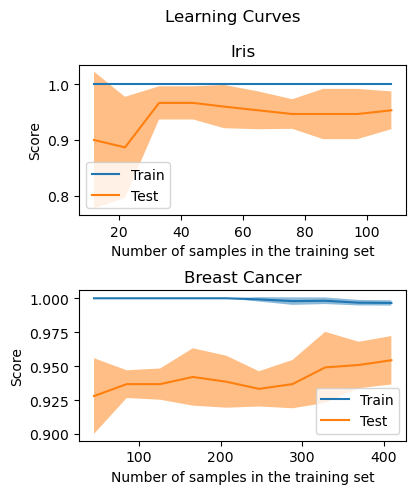

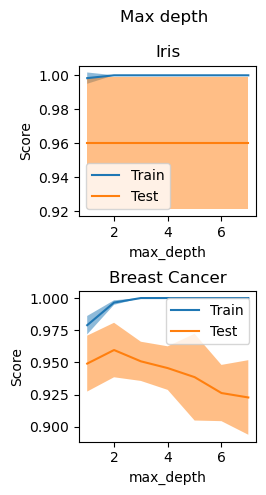

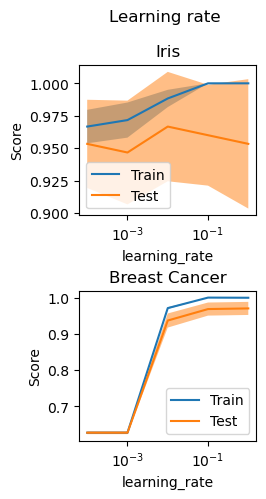

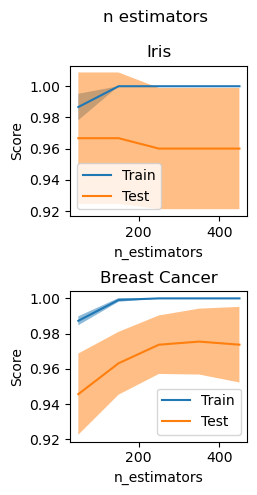

In [3]:
# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)

clf1 = GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 300, learning_rate = 0.05, max_depth = 2)
clf2 = GradientBoostingClassifier(random_state=0, 
                                 n_estimators =100, max_depth = 2, learning_rate = .05)


# learning curves
plt.figure(figsize=(10,6))
fig1, axs1 = plt.subplots(2)
fig1.set_figwidth(4)
fig1.suptitle("Learning Curves")
axs1[0].set_title("Iris")
axs1[1].set_title("Breast Cancer")
fig1.tight_layout()
fig1.subplots_adjust(hspace = .5)
LearningCurveDisplay.from_estimator(clf1, iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0])
LearningCurveDisplay.from_estimator(clf2, 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1])


# Validation curves
fig2, axs2 = plt.subplots(2)
fig2.suptitle("Max depth")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 300, learning_rate = 0.05), iris_x, iris_y, 
                                      param_name= "max_depth", 
                                      param_range = [x for x in range(1,8)],
                                     ax = axs2[0])

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 100, learning_rate = 0.05), bc_x, bc_y, 
                                      param_name= "max_depth", 
                                      param_range = [x for x in range(1,8)],
                                     ax = axs2[1])

fig3, axs3 = plt.subplots(2)
fig3.suptitle("Learning rate")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.set_figwidth(2)
fig3.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 300, max_depth = 2),
                                      iris_x, iris_y, param_name= "learning_rate", 
                                      param_range = np.logspace(-4,0, 5),
                                     ax = axs3[0])

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 n_estimators =100, max_depth = 2), 
                                     bc_x, bc_y,
                                      param_name= "learning_rate", 
                                    param_range = np.logspace(-4,0, 5),
                                     ax = axs3[1])

fig4, axs4 = plt.subplots(2)
fig4.suptitle("n estimators")
axs4[0].set_title("Iris")
axs4[1].set_title("Breast Cancer")
fig4.tight_layout()
fig4.set_figwidth(2)
fig4.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                  learning_rate = 0.05, max_depth = 2), 
                                      iris_x, iris_y, param_name= "n_estimators", 
                                      param_range = [x for x in range(50,500,100)],
                                     ax = axs4[0])

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 learning_rate = 0.05, max_depth = 2),
                                      bc_x, bc_y, param_name= "n_estimators", 
                                    param_range = [x for x in range(50,500,100)],
                                     ax = axs4[1])

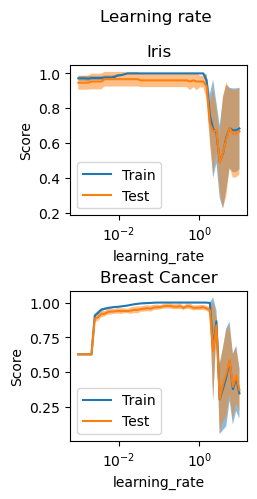

In [6]:
# learning rate curves

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)


fig3, axs3 = plt.subplots(2)
fig3.suptitle("Learning rate")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.set_figwidth(2)
fig3.subplots_adjust(hspace = .5)

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 n_estimators = 300, max_depth = 2),
                                      iris_x, iris_y, param_name= "learning_rate", 
                                      param_range = np.logspace(-3,1),
                                     ax = axs3[0])

ValidationCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=0, 
                                 n_estimators =100, max_depth = 2), 
                                     bc_x, bc_y,
                                      param_name= "learning_rate", 
                                    param_range = np.logspace(-3,1),
                                     ax = axs3[1])
